In [3]:
import itertools
import numpy as np
import os, glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from time import time
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
#from wordcloud import WordCloud
from numpy.random import seed
seed(100)
from bs4 import BeautifulSoup
from textblob import TextBlob
import csv

In [4]:
df1=pd.read_csv("/Users/max/Desktop/capstone/Fake.csv",encoding = 'utf-8', header = 0)
df1["label"]='Fake'
df2=pd.read_csv("/Users/max/Desktop/capstone/True.csv",encoding = 'utf-8', header = 0)
df2["label"]='Real'
news=pd.concat([df1,df2], ignore_index = True)



x=news.title
y=news.label

#checking null values
print('Checking null values .. . ',df1.isnull().sum())
print('Checking null values .. . ',df2.isnull().sum())

                                                    title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   

             subject                date  label  
count          44898               44898  44898  
unique             8                2397      2  
top     politicsNews  December 20, 2017    Fake  
freq           11272                 182  23481  
(44898, 5)
['title', 'text', 'subject', 'date', 'label']
Checking null values .. .  title      0
text       0
subject    0
date       0
label      0
dtype: int64
Checking null values .. .  title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [5]:
news = shuffle(news) # randomize dataset somewhat
print(news.shape)
news.head()

(44898, 5)


,title,text,subject,date,label
11383,IRS GIVES “After School Satan Club” Tax-Exempt...,AFTER SCHOOL SATAN CLUB Allowed By School Dist...,politics,"Mar 17, 2017",Fake
40964,Talks seek to secure Islamic State withdrawal ...,"AIN ISSA, Syria (Reuters) - Remaining Islamic ...",worldnews,"October 14, 2017",Real
31695,Supreme Court rejects Michigan straight-ticket...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"September 9, 2016",Real
27801,U.S. says strike hits 20 percent of Syria's op...,WASHINGTON (Reuters) - The U.S. cruise missile...,politicsNews,"April 10, 2017",Real
7559,Republican EXPLODES After Obama Foils Evil Sc...,It s like President Obama can t go a day witho...,News,"March 11, 2016",Fake


In [6]:
#news1 = pd.DataFrame(news.head(100))
#news1[['polarity', 'subjectivity']] = news1['title'].apply(lambda title: pd.Series(TextBlob(title).sentiment))

In [7]:
#news1

In [8]:
#news2 = pd.DataFrame(news)
#news2[['polarity', 'subjectivity']] = news2['title'].apply(lambda title: pd.Series(TextBlob(title).sentiment))

In [9]:
#news2

In [10]:
#s1 = news1.groupby('label', as_index=False)["subjectivity"].mean()
#s1

In [11]:
#s2 = news1.groupby('label', as_index=False)["subjectivity"].median()
#s2

In [12]:
#def mode(a):
#    u, c = np.unique(a, return_counts=True)
#    return u[c.argmax()]
#s3 = news1.groupby('label', as_index=False)["subjectivity"].apply(mode)
#s3

In [13]:
#from scipy import stats
#news1.groupby('label', as_index=False)["subjectivity"].apply(stats.mode)


In [14]:
#p1 = news1.groupby('label', as_index=False)["polarity"].mean()

#p1

In [15]:
#p2 = news1.groupby('label', as_index=False)["polarity"].median()

#p2

In [16]:
#def mode(a):
#    u, c = np.unique(a, return_counts=True)
#    return u[c.argmax()]
#p3 = news1.groupby('label', as_index=False)["polarity"].apply(mode)

#p3

In [17]:
#from scipy import stats
#news1.groupby('label', as_index=False)["polarity"].apply(stats.mode)


In [18]:
#p2['polarity']

In [19]:
#Subjectivity Plot
#x = ['Fake','Real']

#ax = plt.subplot()
#ax.set_ylim([0,1])
#ax.bar(x, s1['subjectivity'], width = 0.2, color='b', align='center', label = 'Mean')
#ax.bar(x, s2['subjectivity'], width = -0.2, color='r', align='edge', label = 'Median')
#ax.bar(x, s3, width = 0.2, color='g', align='edge', label = 'Mode')

In [20]:
#Subjectivity Plot
#x = ['Fake','Real']

#ax = plt.subplot()
#ax.set_ylim([-1,1])
#ax.bar(x, p1['polarity'], width = -0.3, color='b', align='edge', label = 'Mean')
#ax.bar(x, p2['polarity'], width = 0.3, color='r', align='center', label = 'Median')
#ax.bar(x, p3, width = 0.3, color='g', align='edge', label = 'Mode')

In [21]:
####Switch this section if wanting to take title of text sentiment

df1
fnew = pd.DataFrame(df1)
fnew[['polarity', 'subjectivity']] = fnew['text'].apply(lambda text: pd.Series(TextBlob(text).sentiment))
fnew

,title,text,subject,date,label,polarity,subjectivity
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0.082132,0.599895
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,-0.005004,0.334098
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,-0.012345,0.541969
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,-0.023118,0.394086
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,-0.011722,0.495222
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake,0.004710,0.502536
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake,-0.037730,0.405392
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake,0.042045,0.307915
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake,0.042951,0.509179
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake,0.091346,0.515224


In [22]:
##Switch this section if wanting to take title of text sentiment
df2
tnew = pd.DataFrame(df2)
tnew[['polarity', 'subjectivity']] = tnew['text'].apply(lambda text: pd.Series(TextBlob(text).sentiment))
tnew

,title,text,subject,date,label,polarity,subjectivity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,0.037083,0.410250
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,0.055880,0.298557
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,0.115930,0.316798
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,0.035968,0.306569
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,0.030093,0.399891
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",Real,-0.017463,0.354410
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",Real,-0.016925,0.472151
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Real,-0.006731,0.617308
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Real,0.188817,0.543595
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",Real,-0.066667,0.533333


In [23]:
tnew['polarity'].mean()

0.053532708516390845

In [24]:
fnew['polarity'].mean()

0.05947378235243156

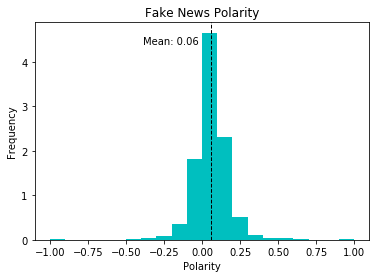

In [25]:
#Fake news Polarity
f = fnew.iloc[:,5]
f
x = f

num_bins = 20

plt.hist(x, num_bins, density=5, facecolor='c')
plt.axvline(fnew['polarity'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fnew['polarity'].mean()-0.45, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.ylabel('Frequency')
plt.xlabel('Polarity')
plt.title('Fake News Polarity')


plt.show()


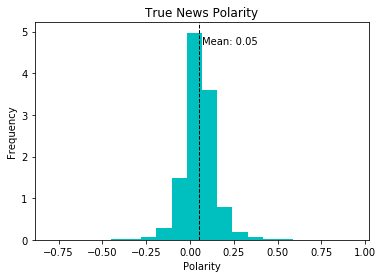

In [26]:
#Real news Polarity
f = tnew.iloc[:,5]
f
x = f

num_bins = 20
plt.hist(x, num_bins, density=5, facecolor='c')
plt.axvline(tnew['polarity'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(tnew['polarity'].mean()*1.3, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

plt.ylabel('Frequency')
plt.xlabel('Polarity')
plt.title('True News Polarity')


plt.show()

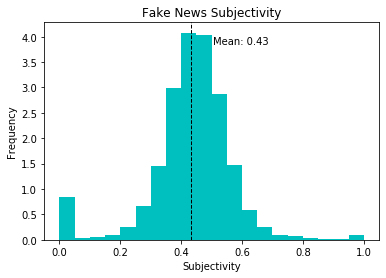

In [27]:
#Fake news Subjectivity
f = fnew.iloc[:,6]
f
x = f

num_bins = 20
plt.hist(x, num_bins, density=5, facecolor='c')
plt.axvline(fnew['subjectivity'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fnew['subjectivity'].mean()*1.16, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

plt.ylabel('Frequency')
plt.xlabel('Subjectivity')
plt.title('Fake News Subjectivity')


plt.show()

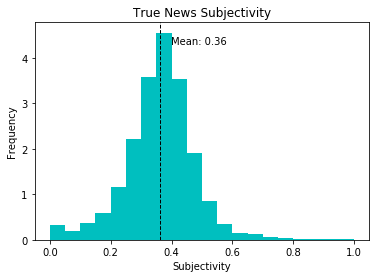

In [28]:
#Real news Subjectivity
f = tnew.iloc[:,6]
f
x = f

num_bins = 20

plt.hist(x, num_bins, density=5, facecolor='c')
plt.axvline(tnew['subjectivity'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(tnew['subjectivity'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.ylabel('Frequency')
plt.xlabel('Subjectivity')
plt.title('True News Subjectivity')


plt.show()